# 📊 ESS 10 Data Analysis - subsetting dataframes using pandas
This notebook shows how to:  
1. Load data from the **European Social Survey (ESS10)**
2. Create a **list of variables** to keep
3. Create a **subset of the dataset**
4. Create a subset **that uses only French data** using two different methods

Each step is commented to help understand the code.

In [ ]:
# Import Relevant Libraries/Packages/Modules
import os
import requests
import zipfile
import pandas as pd


In [ ]:
# Preparing Relevant Paths & Folders
file_url = "https://github.com/datamisc/ess-10/raw/main/data.zip"
data_dir = "data/raw/"
zip_path = os.path.join(data_dir, "data.zip")
csv_filename = "ESS10.csv"     
csv_path = os.path.join(data_dir, csv_filename)


C:\Users\atlas\AppData\Local\Temp\ipykernel_14404\3254841553.py:4: DtypeWarning: Columns (166,172,174,607,608) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(filename1) # gets the file and saves it in "df1"


In [ ]:

# Ensure directory exists
os.makedirs(data_dir, exist_ok=True)


In [ ]:
# Creating a FUNCTION to download the dataset if not available
def check_data():
    if os.path.exists(csv_path):
        print(f"✅ CSV already exists: {csv_path}")
        return

    print("❗ CSV not found. Downloading ZIP...")

    # Download ZIP
    response = requests.get(file_url)
    response.raise_for_status()
    with open(zip_path, "wb") as f:
        f.write(response.content)
    print(f"📦 ZIP downloaded to: {zip_path}")

    # Extract ZIP
    print("📂 Extracting ZIP...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(data_dir)

    print(f"✅ Files extracted to: {data_dir}")

    # Confirm extraction
    if not os.path.exists(csv_path):
        raise FileNotFoundError(
            f"CSV '{csv_filename}' not found inside ZIP. "
            f"Check ZIP contents in {data_dir}."
        )


In [ ]:

# Use the created function to check if data has been downloaded
check_data()

In [ ]:
# Loading the CSV Data
df1 = pd.read_csv(csv_path) # gets the data and saves it in "df1"

In [3]:
type(df1) # df1 is of type DataFrame, a special pandas type to save date

pandas.core.frame.DataFrame

In [4]:
df1.head() # gives out the first 5 rows of the dataframe df1

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,vinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
0,ESS10e03_2,10,3.2,02.11.2023,10038,BE,0.882220,0.972276,0.718075,0.698167,...,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,36.0,1,1.0,0.000397,188,2596
1,ESS10e03_2,10,3.2,02.11.2023,10053,BE,1.047643,0.888635,0.718075,0.638107,...,2022-04-08 11:07:00,2022-04-08 11:10:00,2022-04-08 11:07:00,2022-04-08 11:10:00,54.0,2,2.0,0.000334,194,2206
2,ESS10e03_2,10,3.2,02.11.2023,10055,BE,1.087741,0.722811,0.718075,0.519033,...,2022-05-20 11:08:00,2022-05-20 11:10:00,2022-05-20 11:08:00,2022-05-20 11:10:00,77.0,1,2.0,0.000322,198,2114
3,ESS10e03_2,10,3.2,02.11.2023,10062,BE,0.909910,1.005565,0.718075,0.722072,...,2022-05-22 13:58:00,2022-05-22 13:59:00,2022-05-22 13:58:00,2022-05-22 13:59:00,55.0,1,1.0,0.000385,150,2645
4,ESS10e03_2,10,3.2,02.11.2023,10064,BE,0.918949,0.638705,0.718075,0.458639,...,2022-05-18 11:44:00,2022-05-18 11:45:00,2022-05-18 11:44:00,2022-05-18 11:45:00,55.0,1,1.0,0.000381,149,2313


In [5]:
# insert the names of the variables that are important for the research
# the choice of the variables is justified in the data_and_ressources.typst document on our typst
# in order to get an overview of the variables to add them, check the "ESS10 codebook.html" 
# that you downloaded with the dataset

variables = ["cntry", "prtdgcl", "clsprty", "lrscale", "prtclffr", "agea",]
print(variables)

['cntry', 'prtdgcl', 'clsprty', 'lrscale', 'prtclffr', 'agea']


In [6]:
type(variables)

list

In [7]:
df1["cntry"].value_counts().sort_values().nlargest(7) #shows how many of each variable there is


cntry
GR    2799
BG    2718
IT    2640
CZ    2476
FR    1977
HU    1849
PT    1838
Name: count, dtype: int64

In [8]:
df1["prtdgcl"].value_counts(7)

prtdgcl
6    0.615698
2    0.243652
3    0.065885
1    0.063386
4    0.007870
9    0.001781
8    0.001276
7    0.000452
Name: proportion, dtype: float64

In [9]:
# creates a new dataframe that only contains the variables that we want (called "subsetting")
# this means we don't have to use the large file of 676 columns = 676 variables so it takes less computing power

df1_subset = df1[variables] 

# gives out the first 5 rows of the  new subset

df1_subset.head(7) 

,cntry,prtdgcl,clsprty,lrscale,prtclffr,agea
0,BE,6,2,3,NaN,16
1,BE,6,2,5,NaN,24
2,BE,3,1,5,NaN,58
3,BE,6,2,5,NaN,35
4,BE,6,2,4,NaN,61
5,BE,6,2,5,NaN,46
6,BE,6,2,88,NaN,70


In [10]:
#creates variable mask which includes only french people above 35
mask = (df1_subset["cntry"] == "FR") & (df1_subset ["agea"] > 35)
type(mask)

pandas.core.series.Series

In [11]:
# filters after variables and whether the country is France using the object df1_subset

df1_subset_french1 = df1_subset[mask]
df1_subset_french1.head()


,cntry,prtdgcl,clsprty,lrscale,prtclffr,agea
11180,FR,6,2,3,66.0,74
11181,FR,6,2,5,66.0,39
11182,FR,1,1,4,3.0,59
11183,FR,3,1,9,9.0,57
11184,FR,4,1,7,9.0,63


In [12]:
df1_subset_french1

,cntry,prtdgcl,clsprty,lrscale,prtclffr,agea
11180,FR,6,2,3,66.0,74
11181,FR,6,2,5,66.0,39
11182,FR,1,1,4,3.0,59
11183,FR,3,1,9,9.0,57
11184,FR,4,1,7,9.0,63
...,...,...,...,...,...,...
13149,FR,6,2,8,66.0,43
13150,FR,2,1,3,5.0,66
13151,FR,3,1,4,6.0,51
13152,FR,6,2,7,66.0,52


In [13]:
# filters after variables and whether the country is France using the object df1 and the .loc method

df1_subset_french2 = df1.loc[df1["cntry"] == "FR", variables]
df1_subset_french2.head()


,cntry,prtdgcl,clsprty,lrscale,prtclffr,agea
11177,FR,6,2,5,66.0,23
11178,FR,3,1,0,4.0,32
11179,FR,6,2,5,66.0,25
11180,FR,6,2,3,66.0,74
11181,FR,6,2,5,66.0,39


In [14]:

# the two methods are the same
print(df1_subset_french1.equals(df1_subset_french2))  # True

False


In [14]:
#tracking down variables from the codebooks and creating corresponding objects
#codebook is avalaible here https://stessrelpubprodwe.blob.core.windows.net/data/round10/survey/ESS10_appendix_a7_e03_1.pdf
# Independent variables 
country = df1["cntry"]
age = df1["agea"]#Age of respondent, calculated (how is it calculated? why is it calculated?)
gender = df1["gndr"] #Gender
educ = df1["edlvdfr"] #Highest level of education, France
married = df1["marsts"] #Legal marital status

# Political variables
interest_pol = df1["polintr"] #Interest in politics
party_closeness = df1["prtdgcl"] #How close to party
close_one_party = df1["clsprty"] # Feel closer to a particular party than all other parties
left_right = df1["lrscale"] # Placement on left right scale
close_one_party_fr = df1["prtclffr"] # Which party feel closer to, France
fair_elections = df1["fairelcc"] #In country national elections are free and fair
dfprtalc = df1["dfprtalc"]  #In country different political parties offer clear alternatives to one another




In [38]:
country_proportion = country.value_counts(
    normalize=True
)*100

country_proportion


cntry
GR    7.441972
BG    7.226609
IT    7.019223
CZ    6.583180
FR    5.256441
HU    4.916115
PT    4.886868
IE    4.706070
LT    4.410944
HR    4.232804
FI    4.192922
EE    4.099864
CH    4.049347
NL    3.908431
MK    3.799420
SK    3.770174
NO    3.751562
BE    3.565446
ME    3.397942
SI    3.328813
GB    3.054957
IS    2.400893
Name: proportion, dtype: float64

In [36]:
educ.value_counts(
    normalize = True
)*100

edlvdfr
7.0       21.294891
15.0       8.750632
11.0       8.700051
9.0        7.486090
18.0       6.423875
5.0        5.563986
3.0        4.451189
21.0       4.046535
10.0       3.844208
22.0       3.540718
6.0        3.287810
20.0       3.085483
4.0        2.832575
16.0       2.579666
2.0        2.276176
19.0       2.175013
8.0        1.669196
26.0       1.365706
14.0       1.365706
24.0       1.264542
17.0       0.809307
25.0       0.758725
13.0       0.708144
23.0       0.455235
1.0        0.455235
5555.0     0.354072
12.0       0.303490
7777.0     0.151745
Name: proportion, dtype: float64

<Axes: ylabel='Frequency'>

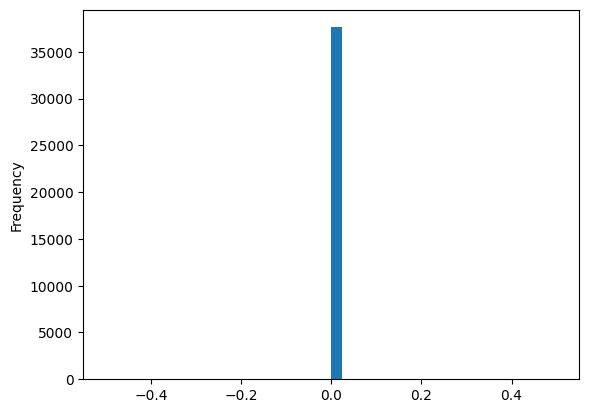

In [17]:
age_mean = df1["agea"].between(1, 10)
age_mean = age_mean.astype(float)
age_mean.plot(kind="hist", bins=40)  #how do I exclude statistcal outliers? 
#i tried to make a graph to show the repartition of ages but it's not working
#need to learn how to exclude statistical outliers

In [18]:
age.value_counts #counts the number of respondents that have entered their age
age_mean2 = age.mean().__round__(2) #this calculates the average age of respondents, and rounds it to 2 decimals
print(f"The mean age of a respondent is {age_mean2} years old.") #This writes us a sentence to say it.

The mean age of a respondent is 58.21 years old.


In [20]:
gender.value_counts
gender_proper = gender.replace(
    {1: "Male", 2: "Female"}) #this creates a new object, based on gender, which cleans it up
gender_proper.value_counts(
    normalize=True)*100
#This gives us the proportion of male and female respondents. 

gndr
Female    53.569434
Male      46.430566
Name: proportion, dtype: float64

In [21]:
gender_proper = gender_proper.astype(float)
gender_proper.plot(
    kind="bar",
    title="Gender", 
    ylabel="Percentage",
    rot=0)

#I tried to make a bar chart to represent the M-F proportion that I got above, but it's not working
#Need to ask temporao about it

ValueError: could not convert string to float: 'Female'

In [23]:
lr = left_right.value_counts(
    normalize = True)*100

lr

lrscale
5     28.090186
7      9.382893
88     9.021297
6      8.202388
8      7.731781
3      7.516418
4      7.213315
2      4.753928
77     4.490708
10     4.488049
0      3.722315
9      2.547127
1      2.267954
99     0.571641
Name: proportion, dtype: float64

<Axes: xlabel='lrscale'>

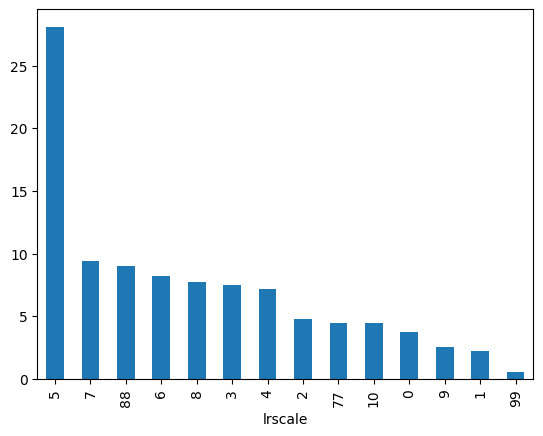

In [24]:
lr.plot(kind='bar')